In [1]:
import os
import anndata as ad
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import scanpy as sc

# Code to make a stacked barplot of celltypes (or any desired column) across timepoint (or any desired column).

### Run these functions before starting

In [2]:
def calculate_celltype_fractions(input_df, cell_types_of_interest, celltype, timepoint):
    # Filter the DataFrame to include only the desired cell types
    filtered_df = input_df[input_df[celltype].isin(cell_types_of_interest)]

    # Group by 'timepoint' and 'celltype' and count the occurrences
    counts = filtered_df.groupby([timepoint, celltype]).size().reset_index(name='count')

    # Pivot the DataFrame to have 'timepoint' as the index and cell types as columns
    pivoted_df = counts.pivot(index=timepoint, columns=celltype, values='count')

    # Fill NaN values with 0
    #pivoted_df.fillna(0, inplace=True)

    # Drop columns with all NaNs or 0s
    pivoted_df = pivoted_df.dropna(axis=1, how='all')
    pivoted_df = pivoted_df.loc[:, (pivoted_df != 0).any(axis=0)]
    
    # Calculate the total count for each timepoint
    total_counts = pivoted_df.sum(axis=1)

    # Calculate the fractions for each cell type
    fraction_df = pivoted_df.divide(total_counts, axis=0) * 100  # Multiply by 100 to get percentages

    # Reset the index and rename the columns
    fraction_df.reset_index(inplace=True)
    fraction_df.columns.name = None

    return fraction_df


In [3]:
def stackbarplot_celltypes(result_df):
    # Sort the DataFrame based on the 'timepoint' column in the desired order
    timepoint_order = ['10hpf', '12hpf', '14hpf', '16hpf', '19hpf', '24hpf', '2dpf', '3dpf', '5dpf', '10dpf']
    result_df = result_df.set_index('timepoint').loc[timepoint_order].reset_index()

    # Create a stacked bar plot with custom timepoint order
    ax = result_df.plot(x='timepoint', kind='bar', stacked=True)

    # Move the legend outside and to the upper right corner
    ax.legend(title='Cell Type', loc='upper right', bbox_to_anchor=(1.5, 1))

    plt.xlabel('Timepoint')
    plt.ylabel('Percentage')
    plt.title('Stacked Bar Plot of Cell Type Fractions')
    plt.show()


In [4]:
def helper_combine_adata(myadatas = []):
    
    myobs_all = []
    
    for adata in myadatas:
        myobs_all.append(adata.obs.copy())
    
    return pd.concat(myobs_all, axis=0, ignore_index=True)

# To make a stacked cell type barplot

### Import adata object(s)

Import the adata object of interest, then specify the cell types in the list and the name of the cell type column, and timepoint column.

If there is only one adata object with all information, run the following:

In [5]:
adata = sc.read_h5ad('/home/sarah.ancheta/bruno/projects/data.science/alejandro/danio-atlas/atlas_objects/velocity_objects/velocyto_Zebrahub_115k_cells.h5ad')

In [6]:
input_df = adata.obs.copy()

If there are multiple adata objects for different timepoints, first check that each adata has a cell type column, and ensure that the name of the cell type column is the same across all objects. In addition, ensure that each adata has a timepoint column, and the timepoint column has the same name for all objects. Then run the following function, with the list of your adata objects as the input.

In [7]:
adata1 = sc.read_h5ad('/home/sarah.ancheta/bruno/projects/data.science/alejandro/danio-atlas/atlas_objects/velocity_objects/velocyto_Zebrahub_115k_cells.h5ad')

In [8]:
#include all adata objects in the list below
myadatas_list = [adata1]
input_df = helper_combine_adata(myadatas_list)

### Specify columns and cell types of interest

Run the following for a stacked barplot by cell type. Specify the desired cell types in the list, and replace the column names for celltype and timepoint below.

In [17]:
cell_types_of_interest = ['periderm', 'central_nervous_system', 'notochord', 'lateral_mesoderm', 'paraxial_mesoderm']
celltype = 'zebrafish_anatomy_ontology_class'
timepoint = 'timepoint'

In [18]:
result_df = calculate_celltype_fractions(input_df, cell_types_of_interest, celltype, timepoint)

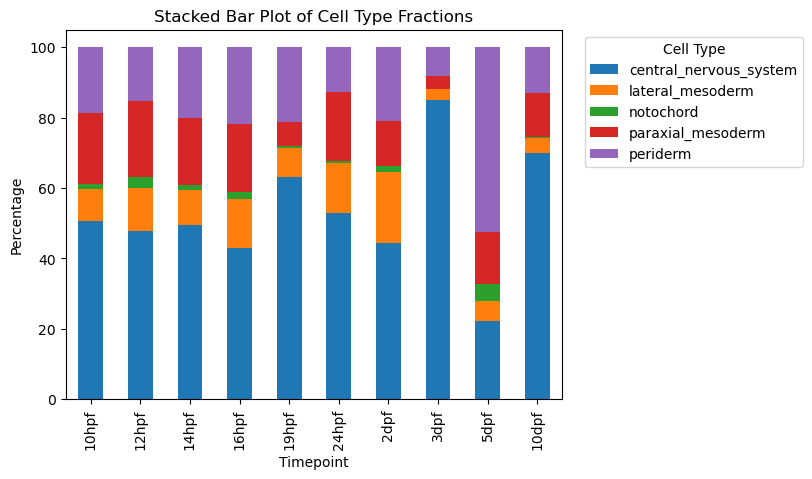

In [19]:
stackbarplot_celltypes(result_df)

## Additional code- for plotting all cell types

### If we are interested in plotting all cell types, use the following.

Input the celltype column name for which to plot all cell types

In [13]:
celltype_column_ofinterest = 'zebrafish_anatomy_ontology_class'
allcelltypes = input_df[celltype_column_ofinterest].unique()

In [14]:
#this line sets the cell types of interest to be 'mycelltypes', the variable created above

cell_types_of_interest = allcelltypes

#replace the column names for celltype and timepoint, as desired

celltype = 'zebrafish_anatomy_ontology_class' 
timepoint = 'timepoint'

In [15]:
result_df = calculate_celltype_fractions(input_df, cell_types_of_interest, celltype, timepoint)

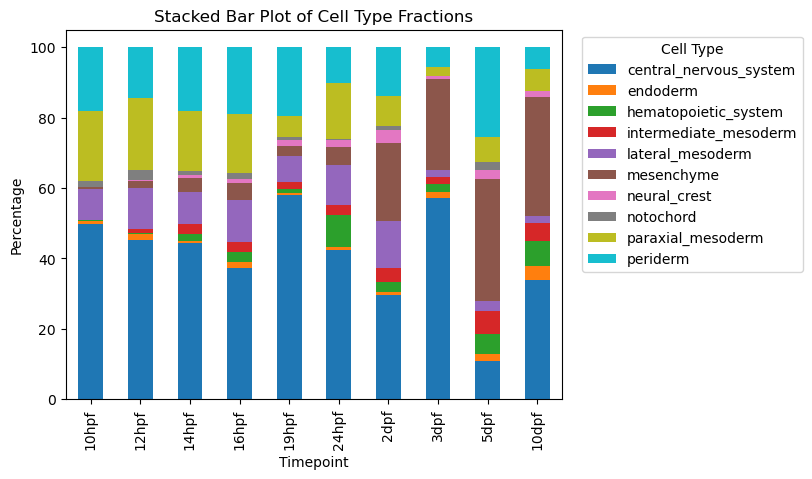

In [16]:
stackbarplot_celltypes(result_df)